# Proyek Pertama : Predictive Analytics


Dataset link: https://www.kaggle.com/datasets/rajattomar132/payment-date-dataset

Kumpulan data faktur berisi informasi pembayaran sebelumnya dan perilaku berbagai pembeli. Berdasarkan pola pembayaran sebelumnya, model ML akan memprediksi tanggal pembayaran yang akan dilakukan oleh pelanggan untuk faktur. Model tersebut juga akan memprediksi kategori umur faktur berdasarkan tanggal pembayaran yang diprediksi.

## Import Library and Dataset

### Library

In [161]:
# Import libraries yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

### Dataset

In [162]:
url = "https://docs.google.com/spreadsheets/d/14bbC33OrmPFUh4z-Nwtg1Eahv2ofx-BC2omyN063oSY/export?format=csv"
df = pd.read_csv(url)
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,2/11/2020 0:00,2020,1930438491,1/26/2020,20200125,20200126,20200210,USD,RV,1,NaN,54273.28,20200126,NAH4,1.930438e+09,0
1,U001,200980828,BEN E,8/8/2019 0:00,2019,1929646410,7/22/2019,20190722,20190722,20190811,USD,RV,1,NaN,79656.60,20190722,NAD1,1.929646e+09,0
2,U001,200792734,MDV/ trust,12/30/2019 0:00,2019,1929873765,9/14/2019,20190914,20190914,20190929,USD,RV,1,NaN,2253.86,20190914,NAA8,1.929874e+09,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,3/30/2020,20200330,20200330,20200410,CAD,RV,1,NaN,3299.70,20200331,CA10,2.960623e+09,1
4,U001,200769623,WAL-MAR foundation,11/25/2019 0:00,2019,1930147974,11/13/2019,20191113,20191113,20191128,USD,RV,1,NaN,33133.29,20191113,NAH4,1.930148e+09,0


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  int64  
 5   doc_id                  50000 non-null  int64  
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  int64  
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [164]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


## Data Cleaning & Preprocessing

### Konversi kolom tanggal ke format datetime (jika diperlukan)

In [165]:
# Daftar kolom tanggal yang akan dikonversi
date_columns = ['due_in_date', 'posting_date', 'baseline_create_date', 'document_create_date.1', 'document_create_date']

# Loop untuk mengkonversi setiap kolom tanggal ke tipe data datetime
for col in date_columns:
    try:
        df[col] = pd.to_datetime(df[col])
    except ValueError:
        print(f"Gagal mengkonversi kolom '{col}' ke datetime. Periksa format tanggal.")
    except Exception as e:
        print(f"Terjadi error saat mengkonversi kolom '{col}': {e}")


### Drop Comlumn Missing Value

In [166]:
if df['area_business'].isnull().all():
    df.drop(columns=['area_business'], inplace=True)
    print("\nKolom 'area_business' dihapus karena seluruh nilainya null.")


Kolom 'area_business' dihapus karena seluruh nilainya null.


## Exploratory Data Analysis (EDA)

### Genaral Information

In [167]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              40000 non-null  object        
 4   buisness_year           50000 non-null  int64         
 5   doc_id                  50000 non-null  int64         
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              5

In [168]:
print("Statistik Deskriptif:")
df.describe()

Statistik Deskriptif:


,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,50000,50000,50000,50000,50000.0,50000.000000,50000,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2019-09-11 21:07:06.816000,1970-01-01 00:00:00.020193514,1970-01-01 00:00:00.020193537,1970-01-01 00:00:00.020193679,1.0,32337.021651,1970-01-01 00:00:00.020193539,2.011340e+09,0.200000
min,2019.000000,1.928502e+09,2018-12-30 00:00:00,1970-01-01 00:00:00.020181226,1970-01-01 00:00:00.020181230,1970-01-01 00:00:00.020181224,1.0,0.720000,1970-01-01 00:00:00.020181214,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2019-05-06 00:00:00,1970-01-01 00:00:00.020190505,1970-01-01 00:00:00.020190506,1970-01-01 00:00:00.020190524,1.0,4928.312500,1970-01-01 00:00:00.020190505,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2019-09-09 00:00:00,1970-01-01 00:00:00.020190908,1970-01-01 00:00:00.020190909,1970-01-01 00:00:00.020190926,1.0,17609.010000,1970-01-01 00:00:00.020190909,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2020-01-31 00:00:00,1970-01-01 00:00:00.020200130,1970-01-01 00:00:00.020200131,1970-01-01 00:00:00.020200216,1.0,47133.635000,1970-01-01 00:00:00.020200131,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2020-05-22 00:00:00,1970-01-01 00:00:00.020200522,1970-01-01 00:00:00.020200522,1970-01-01 00:00:00.020200710,1.0,668593.360000,1970-01-01 00:00:00.020200522,2.960636e+09,1.000000
std,0.460708,2.885235e+08,NaN,NaN,NaN,NaN,0.0,39205.975231,NaN,2.766335e+08,0.400004


In [169]:
print("\nDistribusi Nilai Unik untuk Kolom Kategorikal:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")


Distribusi Nilai Unik untuk Kolom Kategorikal:
business_code: 6 unique values
cust_number: 1099 unique values
name_customer: 4192 unique values
clear_date: 403 unique values
invoice_currency: 2 unique values
document type: 2 unique values
cust_payment_terms: 74 unique values


### Distribution

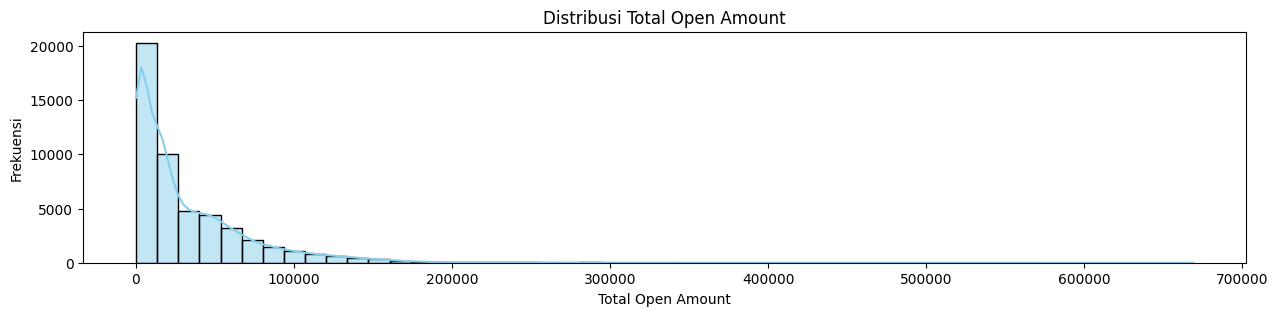

In [170]:
plt.figure(figsize=(15,3))
sns.histplot(df['total_open_amount'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi Total Open Amount')
plt.xlabel('Total Open Amount')
plt.ylabel('Frekuensi')
plt.show()

<ipython-input-171-24ec799908f7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='invoice_currency', palette='Set2')


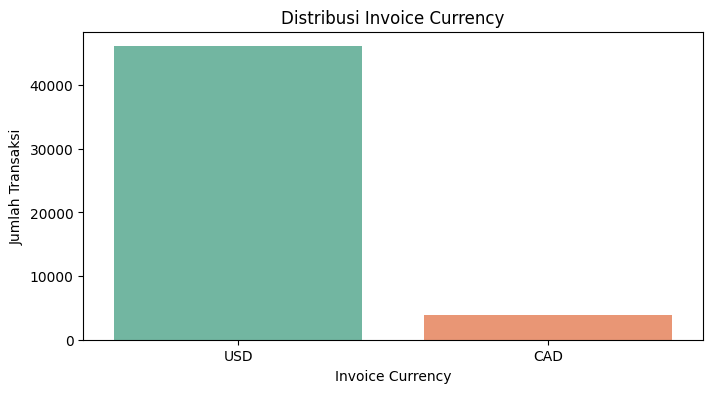

In [171]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='invoice_currency', palette='Set2')
plt.title('Distribusi Invoice Currency')
plt.xlabel('Invoice Currency')
plt.ylabel('Jumlah Transaksi')
plt.show()

<ipython-input-172-b8a10d1b23a2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cust_payment_terms', order=df['cust_payment_terms'].value_counts().index, palette='Set3')


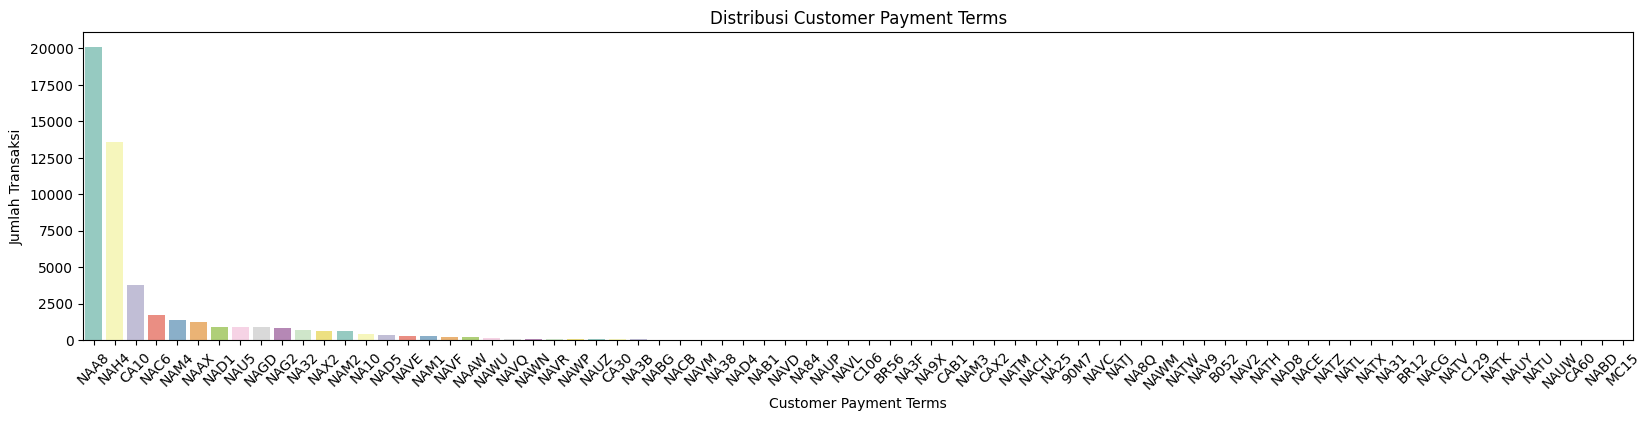

In [172]:
plt.figure(figsize=(20,4))
sns.countplot(data=df, x='cust_payment_terms', order=df['cust_payment_terms'].value_counts().index, palette='Set3')
plt.title('Distribusi Customer Payment Terms')
plt.xlabel('Customer Payment Terms')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

### Trend Waktu

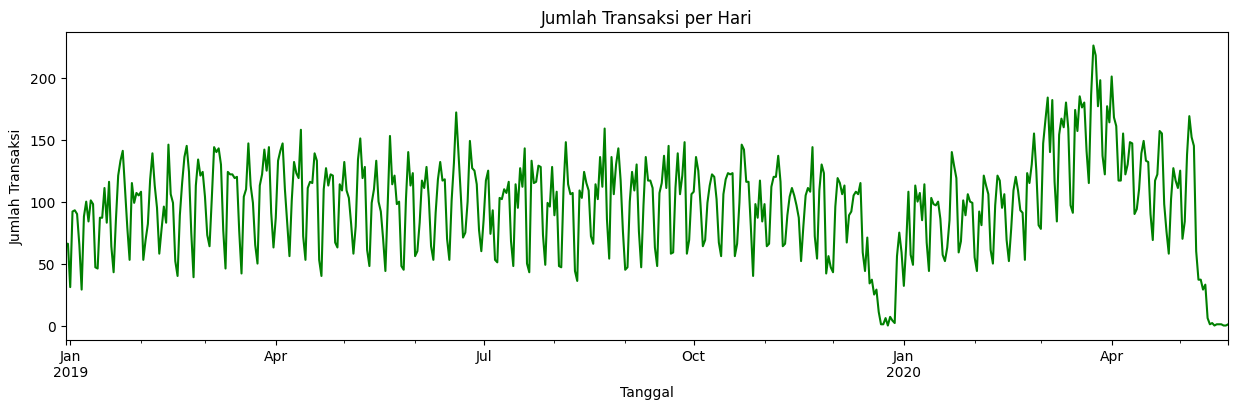

In [173]:
df_time = df.copy()
df_time.set_index('posting_date', inplace=True)
# Hitung jumlah transaksi per hari
daily_transactions = df_time.resample('D').size()

plt.figure(figsize=(15,4))
daily_transactions.plot(color='green')
plt.title('Jumlah Transaksi per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.show()

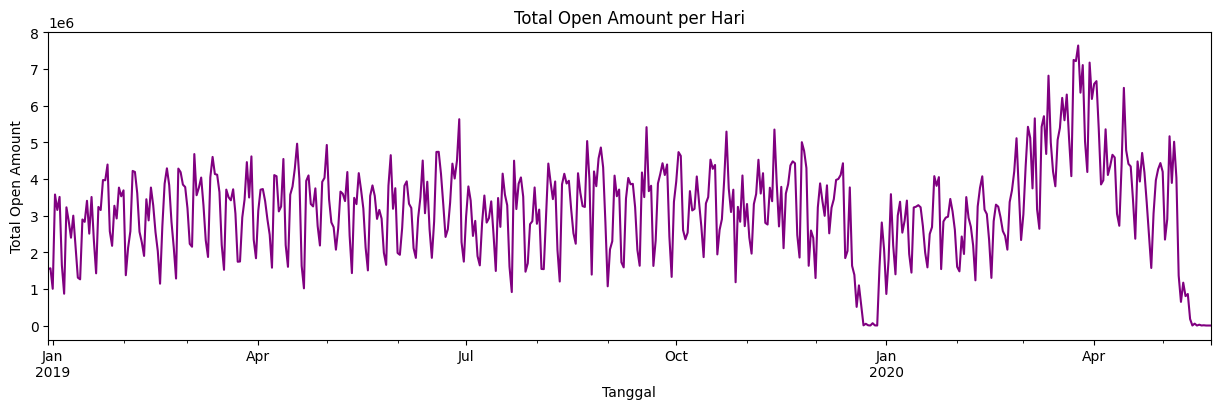

In [174]:
daily_total = df_time['total_open_amount'].resample('D').sum()

plt.figure(figsize=(15,4))
daily_total.plot(color='purple')
plt.title('Total Open Amount per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Total Open Amount')
plt.show()

### Heatmap

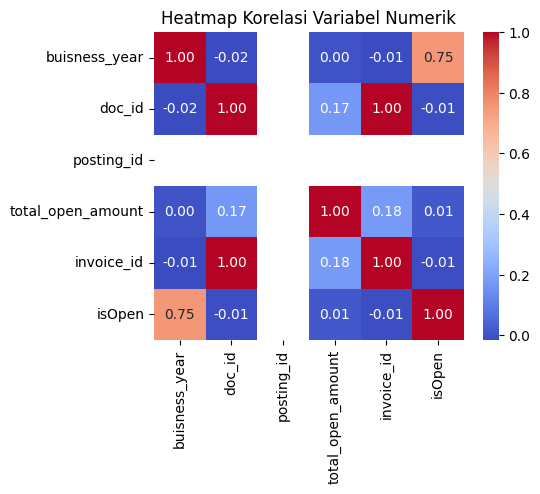

In [175]:
plt.figure(figsize=(5,4))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

## Modeling

### Menentukan Fitur dan Target

In [176]:
# Misalnya, kita gunakan beberapa fitur yang dianggap relevan dan mengabaikan kolom yang tidak diperlukan.
# Target: 'isOpen'
target = 'isOpen'
# Contoh fitur yang akan digunakan; sesuaikan dengan pemahaman data Anda.
features = ['business_code', 'buisness_year', 'doc_id', 'total_open_amount',
            'invoice_currency', 'document type', 'cust_payment_terms']


In [177]:
# Menentukan Fitur Numerik dan Kategorikal
categorical_features = ['business_code', 'invoice_currency', 'document type', 'cust_payment_terms']
numeric_features = [col for col in features if col not in categorical_features]
print("Fitur Numerik:", numeric_features)
print("Fitur Kategorikal:", categorical_features)


Fitur Numerik: ['buisness_year', 'doc_id', 'total_open_amount']
Fitur Kategorikal: ['business_code', 'invoice_currency', 'document type', 'cust_payment_terms']


### Preprocessing Pipeline

In [178]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


### Split Data ke Training dan Testing

In [179]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)


Shape X_train: (40000, 7)
Shape X_test: (10000, 7)
Shape y_train: (40000,)
Shape y_test: (10000,)


### Model Logistic Regression

In [180]:
# --- Model Baseline: Logistic Regression ---
clf_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

print("=== Logistic Regression ===")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))



=== Logistic Regression ===
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      8029
           1       0.66      0.96      0.78      1971

    accuracy                           0.90     10000
   macro avg       0.83      0.92      0.86     10000
weighted avg       0.92      0.90      0.90     10000

Confusion Matrix:
[[7064  965]
 [  77 1894]]


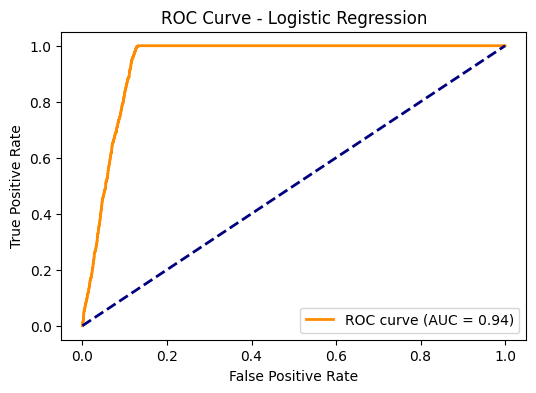

In [181]:
# Plot ROC Curve untuk Logistic Regression
y_pred_proba_lr = clf_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


### Model Random Forest

In [182]:
# --- Model Alternatif: Random Forest ---
clf_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

print("\n=== Random Forest ===")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))




=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8029
           1       0.99      0.99      0.99      1971

    accuracy                           1.00     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000

Confusion Matrix:
[[8012   17]
 [  17 1954]]


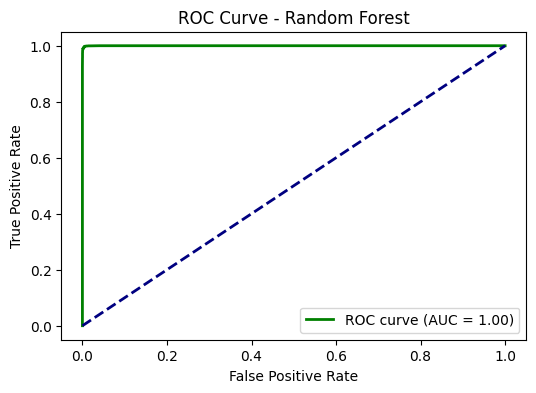

In [183]:
# Plot ROC Curve untuk Random Forest
y_pred_proba_rf = clf_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


### Hyperparameter Tuning pada Random Forest dengan GridSearchCV

In [184]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(clf_rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\n=== Hasil Hyperparameter Tuning ===")
print("Best parameters found: ", grid_search.best_params_)



=== Hasil Hyperparameter Tuning ===
Best parameters found:  {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


In [185]:
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("\n=== Best Random Forest ===")
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))



=== Best Random Forest ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8029
           1       0.99      0.99      0.99      1971

    accuracy                           1.00     10000
   macro avg       1.00      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000

Confusion Matrix:
[[8015   14]
 [  18 1953]]


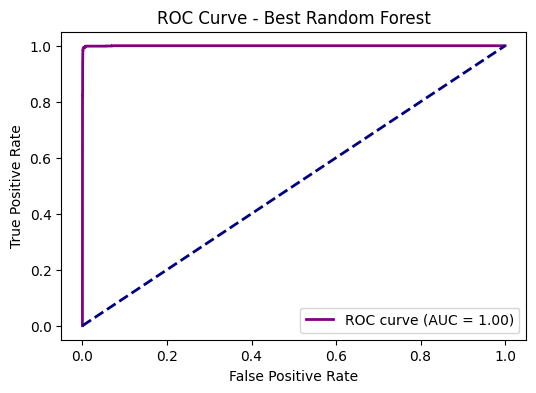

In [186]:
# Plot ROC Curve untuk model terbaik
y_pred_proba_best_rf = best_rf.predict_proba(X_test)[:, 1]
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_proba_best_rf)
roc_auc_best = auc(fpr_best, tpr_best)

plt.figure(figsize=(6, 4))
plt.plot(fpr_best, tpr_best, color='purple', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Random Forest')
plt.legend(loc="lower right")
plt.show()
